<a href="https://colab.research.google.com/github/abartczak01/ML-water-potability/blob/main/water_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Preprocessing

In [27]:
data = pd.read_csv("/content/drive/MyDrive/colab/water_potability.csv")

In [28]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [29]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Brakujące dane

In [30]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

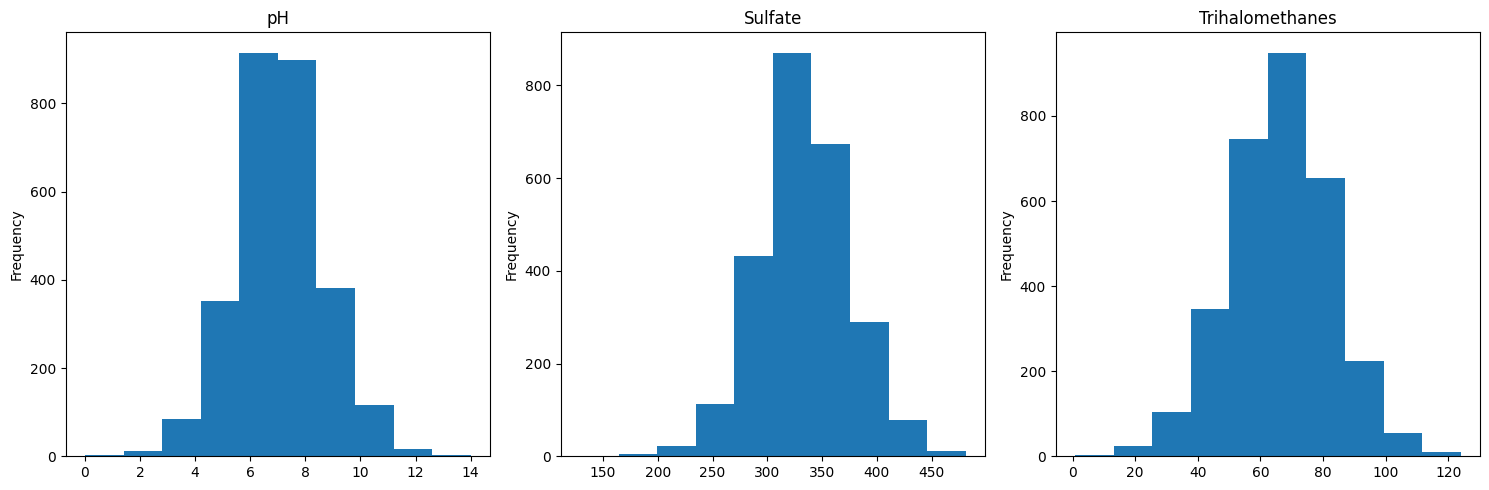

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
data['ph'].plot(kind='hist', ax=axes[0], title='pH')
data['Sulfate'].plot(kind='hist', ax=axes[1], title='Sulfate')
data['Trihalomethanes'].plot(kind='hist', ax=axes[2], title='Trihalomethanes')

plt.tight_layout()
plt.show()

Kolumny w których brakuje wartości mają kształt rozkładów nomralnych, więc uzupełniono je wartościami średnimi.

In [32]:
data.fillna(data.mean(), inplace=True)

In [33]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

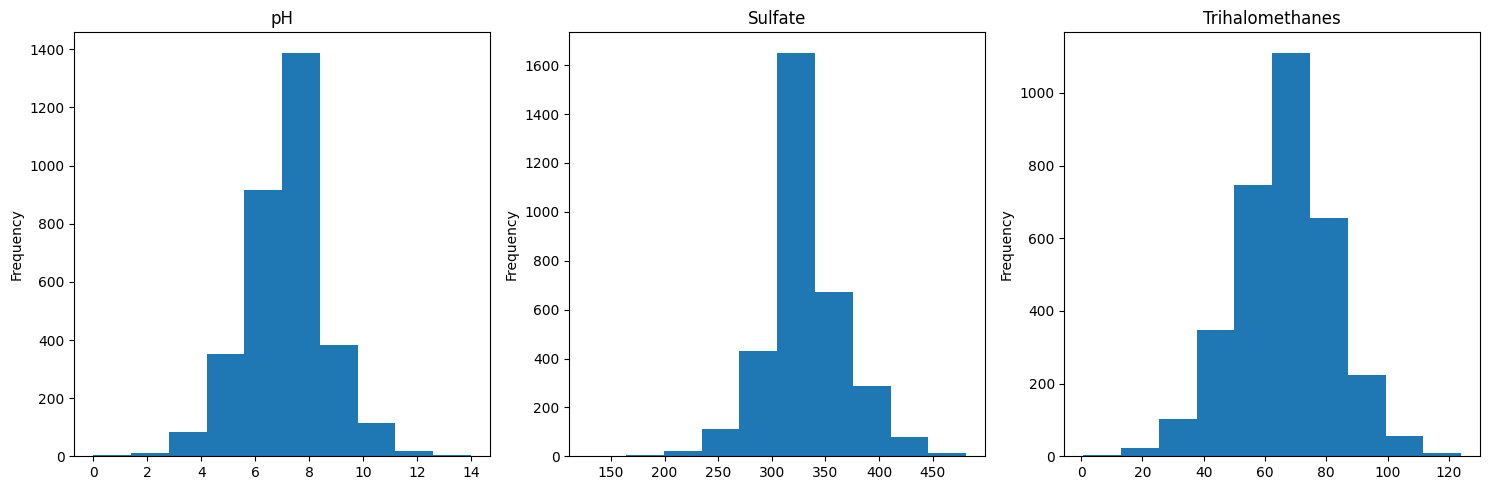

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
data['ph'].plot(kind='hist', ax=axes[0], title='pH')
data['Sulfate'].plot(kind='hist', ax=axes[1], title='Sulfate')
data['Trihalomethanes'].plot(kind='hist', ax=axes[2], title='Trihalomethanes')

plt.tight_layout()
plt.show()

In [35]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Balansowanie próbek
Liczność próbek jest zrównoważona w wystarczającym stopniu, więc nie balansowano danych.

In [36]:
data.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: xlabel='Potability'>

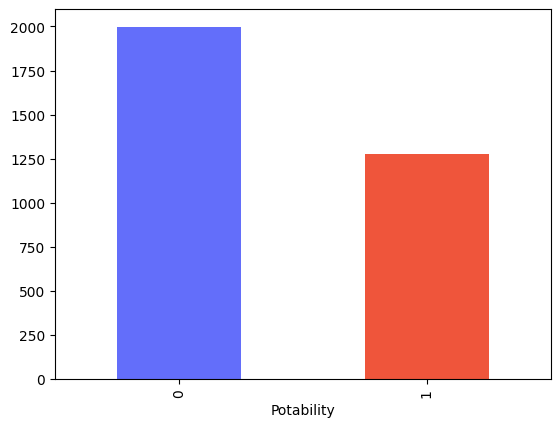

In [37]:
data.Potability.value_counts().plot(kind="bar", color=["#636efa", "#ef553b"])

In [38]:
fig = px.pie(data, names="Potability")
fig.update_layout(width=500, height=500)
fig.show()

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

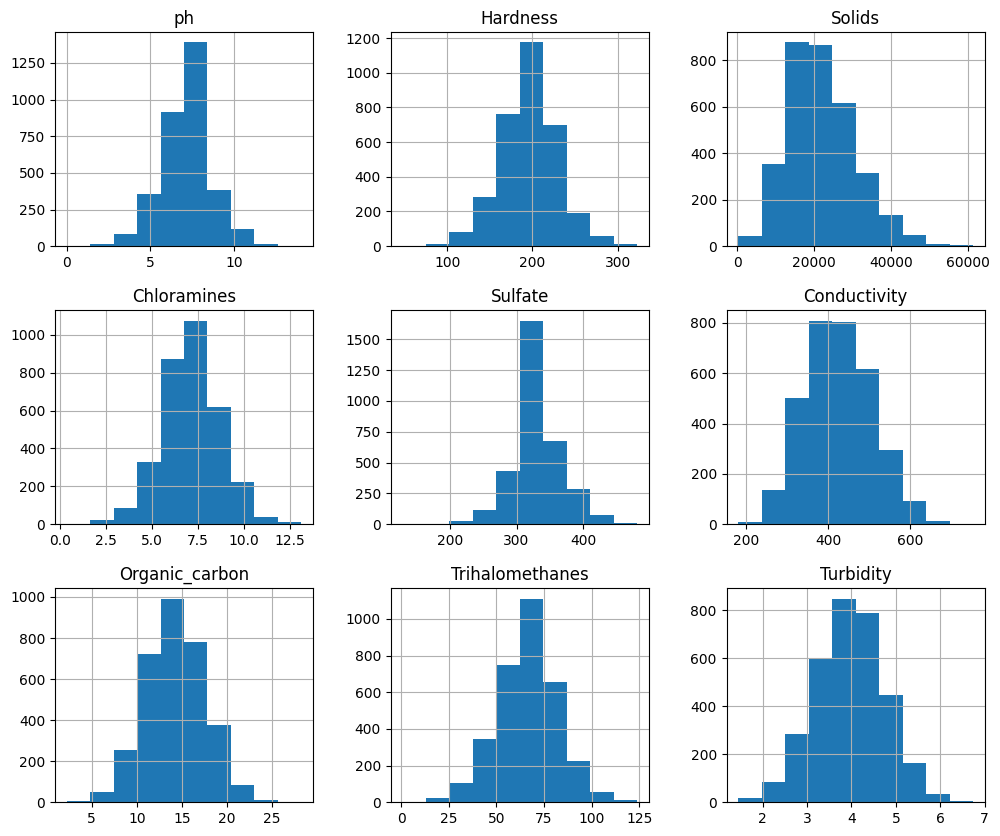

In [39]:
features_to_plot = data.drop(columns=['Potability'])
features_to_plot.hist(figsize=(12, 10))

## Macierz korelacji cech
Z analizy poniższej macierzy korelacji wynika, że cechy są ze sobą skorelowane w niewielkim stopniu. Stąd nie usunięto żadnej z nich.

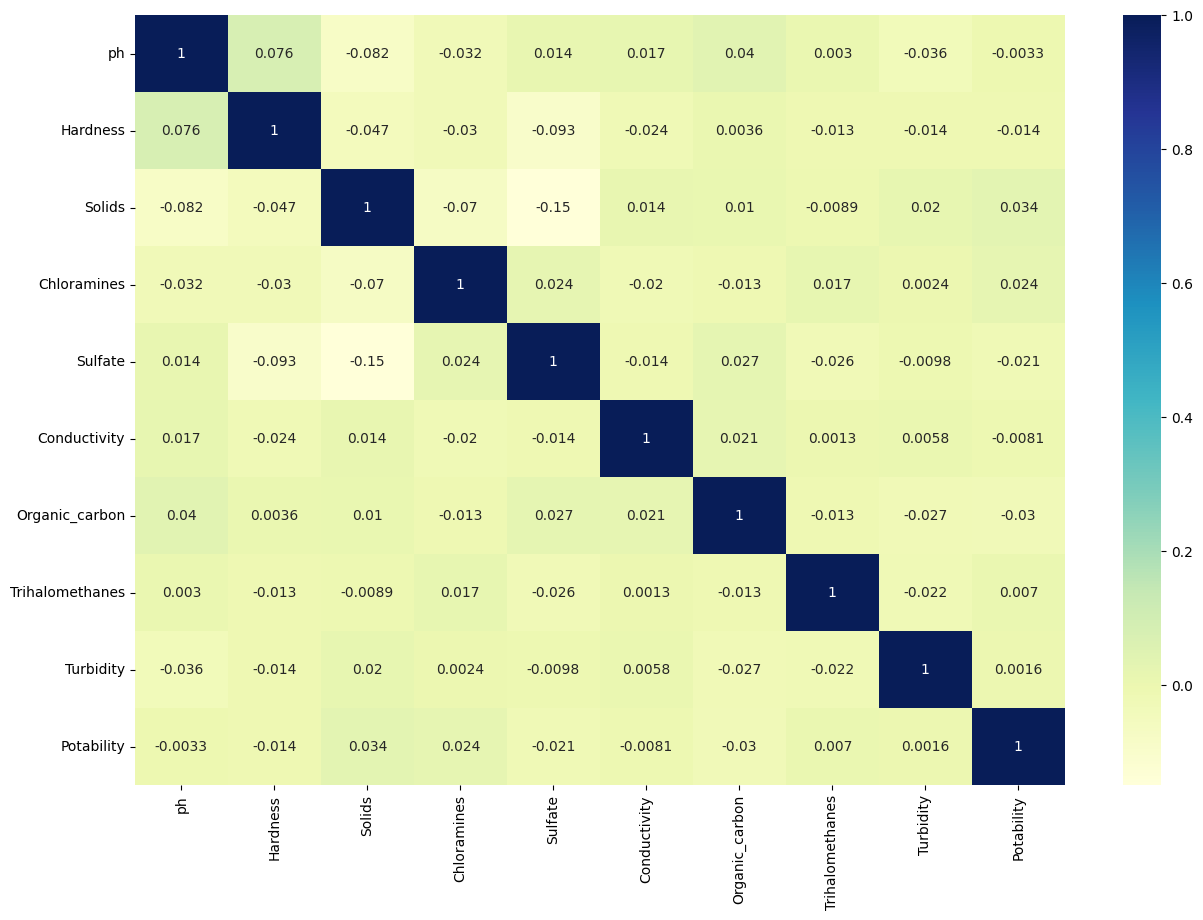

In [40]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Charakterystyka danych

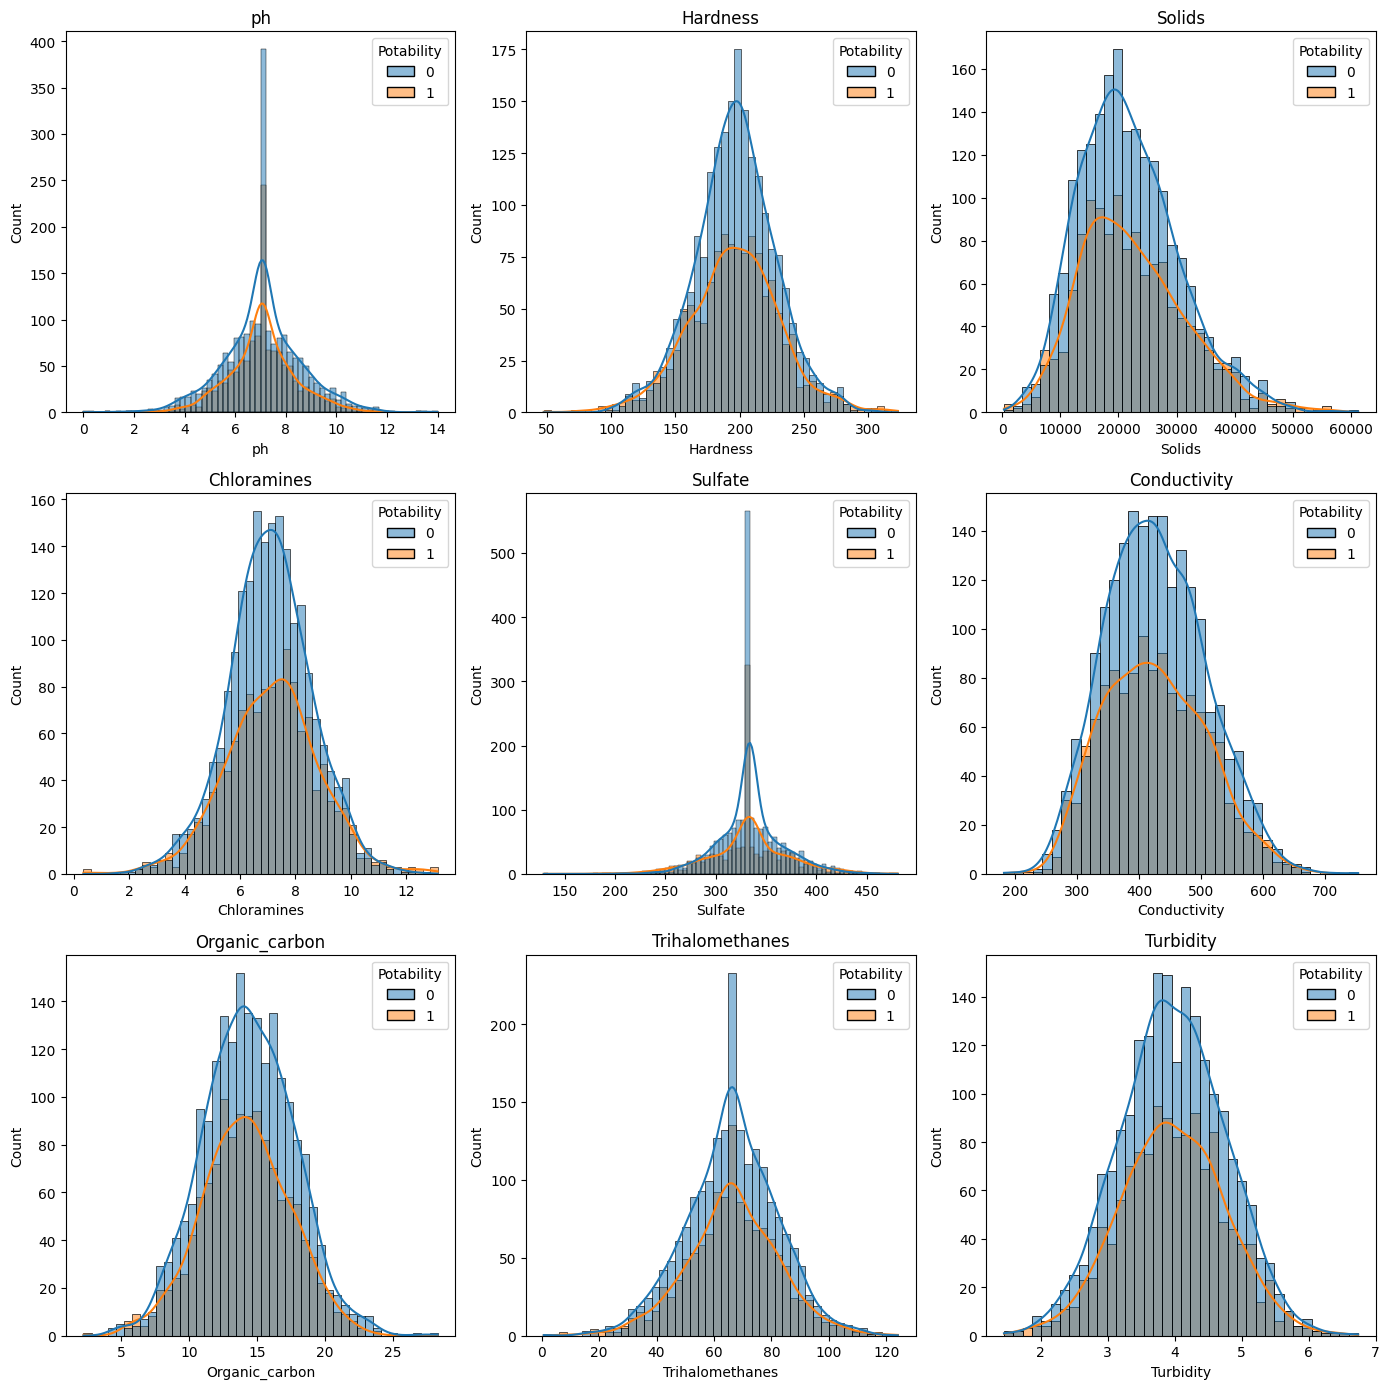

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 14))

axes = axes.flatten()

for i, column in enumerate(data.columns):
    if column != "Potability":
        sns.histplot(data=data, x=column, kde=True, hue="Potability", ax=axes[i])
        axes[i].set_title(column)

plt.tight_layout()
plt.show()

Wartości średnie cech dla wody niezdatnej i zdatnej do spożycia nie różnią się między sobą znacząco. Na podstawie samej analizy wartości średnich nie da się rozróżnić tych dwóch klas.

In [42]:
grouped_mean = data.groupby("Potability").mean().T
grouped_mean['Percentage Difference'] = (abs(grouped_mean[1] - grouped_mean[0]) / grouped_mean[0]) * 100
grouped_mean

Potability,0,1,Percentage Difference
ph,7.084658,7.074754,0.139791
Hardness,196.733292,195.800744,0.474016
Solids,21777.490788,22383.991018,2.784987
Chloramines,7.092175,7.169338,1.088009
Sulfate,334.371700,332.844122,0.456850
Conductivity,426.730454,425.383800,0.315575
Organic_carbon,14.364335,14.160893,1.416305
Trihalomethanes,66.308522,66.533513,0.339309
Turbidity,3.965800,3.968328,0.063758


## Outliers

Procent wartości odstających dla każdej z cech jest niewielki, większość wynosi mniej niż 3%. Dla siarczanów (Sulfate) wartość ta wyniosła 8%, jednak biorąc pod uwagę charakterystykę tej cechy, wartości odstające (max = 481, min = 129) mieszczą się w normach mg/litr dla wód występującyh w naturalnych zbiornikach wodnych. Stąd zdecydowano o pozostawieniu ich w zestawie danych.

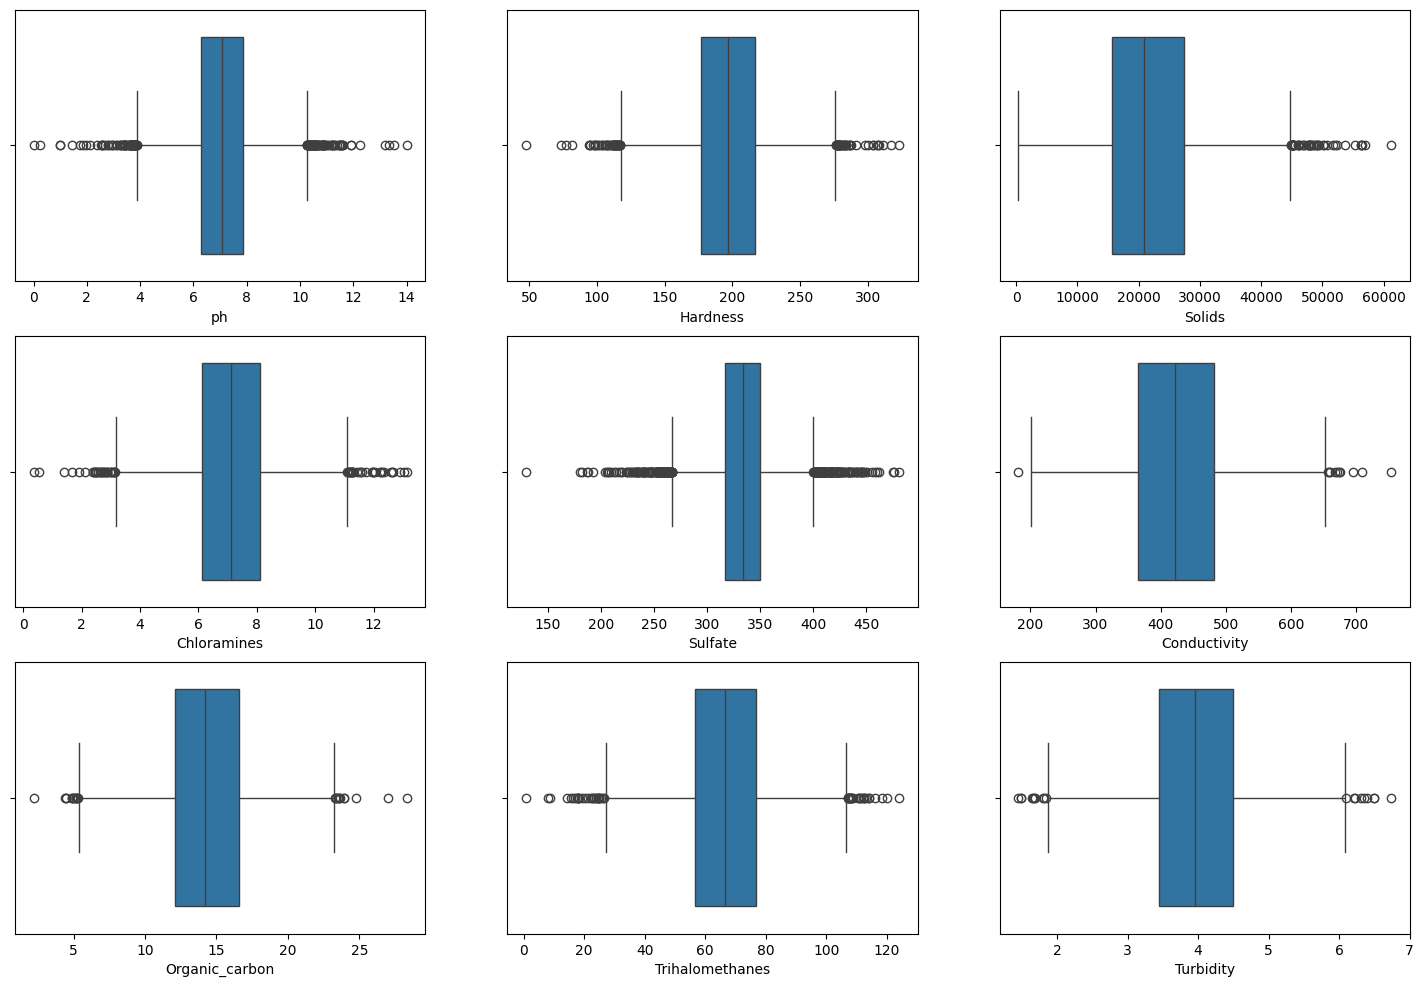

In [43]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(18,12))
ax = ax.flatten()

index = 0
WHIS = 1.5
for col, values in data.items():
  if col != "Potability":
    sns.boxplot(x=col, data=data,ax=ax[index], whis=WHIS)
    index += 1

plt.show()

In [44]:
def identify_outliers(column_data, threshold=1.5):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers_count = len(column_data[(column_data < lower_bound) | (column_data > upper_bound)])
    outliers_percentage = outliers_count / len(column_data) * 100

    return outliers_count, outliers_percentage

outliers_data = []

for column in data.columns:
    outliers_count, outliers_percentage = identify_outliers(data[column], WHIS)
    outliers_data.append([column, outliers_count, outliers_percentage])

outliers_df = pd.DataFrame(outliers_data, columns=["Column", "Outliers count", "Outliers percentage"])
print(outliers_df)

            Column  Outliers count  Outliers percentage
0               ph             142             4.334554
1         Hardness              83             2.533578
2           Solids              47             1.434676
3      Chloramines              61             1.862027
4          Sulfate             264             8.058608
5     Conductivity              11             0.335775
6   Organic_carbon              25             0.763126
7  Trihalomethanes              54             1.648352
8        Turbidity              19             0.579976
9       Potability               0             0.000000


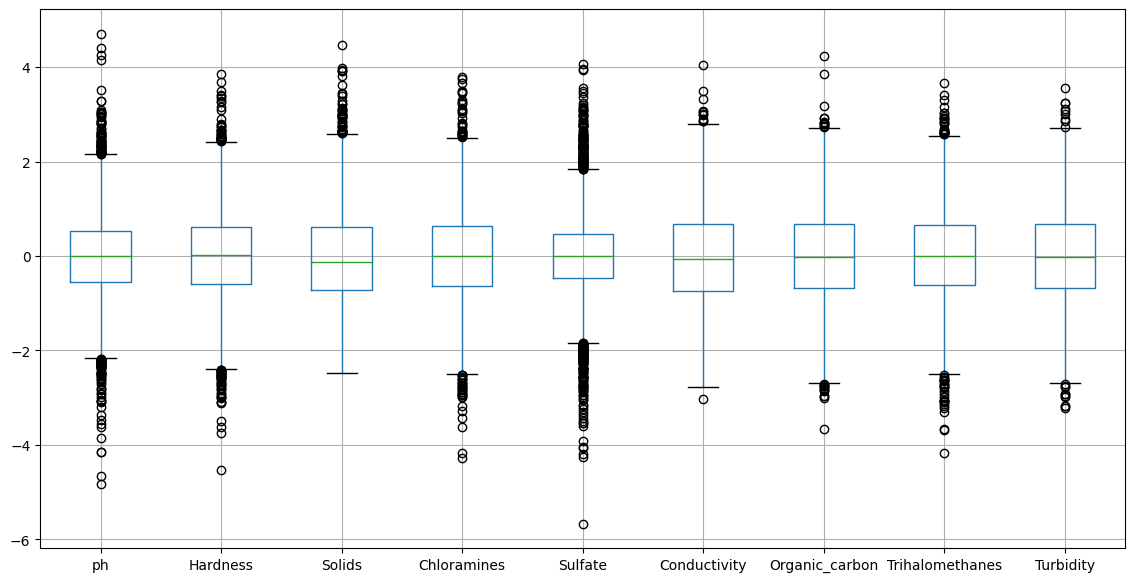

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop(columns=['Potability'])), columns=data.drop(columns=['Potability']).columns)
data_scaled.boxplot(figsize=(14, 7))
plt.show()

In [ ]:
sns.pairplot(data)

# Klasyfikacja

In [46]:
X = data.drop(['Potability'], axis=1)
y = data['Potability']

## Skalowanie danych

Kształ rozkładów dla każdej z cech jest zbliżony kształtem do rozkładu normalnego. Stąd dane przeskalowano przy użyciu StandardScaler.

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## Tworzenie i testowanie prostych klasyfikatorów

## Podział na dane testowe i treningowe

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.to_numpy().reshape(-1, 1))

y_train_dense = y_train_encoded.toarray()
y_test_dense = y_test_encoded.toarray()

## Dobieranie najlepszych parametrów dla wybranych modeli

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [71]:
import time
from sklearn.model_selection import cross_val_score, StratifiedKFold

KF = StratifiedKFold(n_splits = 5)
features = X_scaled
labels = y

def fit_evaluate_model(model):
    print(model.__class__.__name__, "start")
    model_name = model.__class__.__name__
    start_time = time.time()
    accuracies = cross_val_score(model, features, labels, scoring="accuracy", cv=KF)
    end_time = time.time()
    execution_time = (end_time - start_time)
    return model_name, accuracies.mean()*100, execution_time

In [72]:
def find_best_params(estimator, params):
  GridSearchCV1 = GridSearchCV(estimator=estimator,
                              param_grid=params,
                              cv=KF,
                              verbose=1,
                              n_jobs=1,
                              scoring="accuracy",
                              return_train_score=True)
  GridSearchCV1.fit(X_train, y_train)
  best_params = GridSearchCV1.best_params_
  print(f"Best params for {estimator}: {best_params}")
  return best_params

In [73]:
params_lr = {"C": [0.1, 0.3, 0.5, 1, 5], "solver": ["lbfgs", "liblinear"]}
best_params_lr = find_best_params(LogisticRegression(), params_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params for LogisticRegression(): {'C': 0.1, 'solver': 'liblinear'}


In [74]:
params_svc = {"C": [0.1, 0.3, 0.5, 1, 5], "kernel": ["linear", "poly", "rbf", "sigmoid"], "gamma": ["scale","auto"]}
best_params_svc = find_best_params(SVC(), params_svc)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params for SVC(): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [75]:
params_dt = {"min_samples_split": [2, 6], "min_samples_leaf": [1, 2, 4], "max_depth": [None, 5, 10, 20], "criterion": ["gini", "entropy", "log_loss"]}
best_params_dt = find_best_params(DecisionTreeClassifier(), params_dt)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params for DecisionTreeClassifier(): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [76]:
params_rf = {"min_samples_split": [2, 6], "min_samples_leaf": [1, 2, 4], "n_estimators": [100, 200, 300], "criterion": ["gini", "entropy", "log_loss"]}
best_params_rf = find_best_params(RandomForestClassifier(), params_rf)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params for RandomForestClassifier(): {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [77]:
params_et = {"min_samples_split": [2, 6], "min_samples_leaf": [1, 2, 4], "n_estimators": [100, 200, 300], "criterion": ["gini", "entropy", "log_loss"]}
best_params_et = find_best_params(ExtraTreesClassifier(), params_et)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params for ExtraTreesClassifier(): {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}


In [78]:
params_knn = {"n_neighbors": [5, 11, 25, 31, 51], "weights": [None, "uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}
best_params_knn = find_best_params(KNeighborsClassifier(), params_knn)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params for KNeighborsClassifier(): {'algorithm': 'auto', 'n_neighbors': 31, 'weights': 'distance'}


In [79]:
params_gb = {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.5, 1.0], "criterion": ["friedman_mse", "squared_error"], "min_samples_split": [2, 6], "min_samples_leaf": [1, 2, 4]}
best_params_gb = find_best_params(GradientBoostingClassifier(), params_gb)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best params for GradientBoostingClassifier(): {'criterion': 'squared_error', 'learning_rate': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 150}


In [80]:
params_ab = {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.5, 1.0]}
best_params_ab = find_best_params(AdaBoostClassifier(), params_ab)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: Fu

Best params for AdaBoostClassifier(): {'learning_rate': 0.1, 'n_estimators': 50}


## Multilayer Perceptron - MLP

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.model_selection import cross_validate

In [52]:
def plot_accuracy_loss(history):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='train accuracy')
  plt.plot(history.history['val_accuracy'], label='validation accuracy')
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.grid(True, linestyle='--', color='grey')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='train loss')
  plt.plot(history.history['val_loss'], label='validation loss')
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.grid(True, linestyle='--', color='grey')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [53]:
def fit_and_evaluate_MLP(model, model_name, optimizer='adam', loss='categorical_crossentropy', cv=KF, verbosity=0, toPlot=True, epochs=50):
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    checkpoint = ModelCheckpoint(f'drive/MyDrive/colab/{model_name}.keras', monitor='val_accuracy', verbose=verbosity, save_best_only=True, mode='max')
    history = model.fit(X_train, y_train_dense, epochs=epochs, validation_split=0.2, callbacks=[checkpoint], verbose=verbosity)
    if toPlot:
      plot_accuracy_loss(history)

    best_val_accuracy = max(history.history['val_accuracy'])
    print(f"Best Validation Accuracy: {best_val_accuracy*100:.2f}%")

    return best_val_accuracy

In [99]:
y_train_encoded.shape[1]

2

In [98]:
X_train.shape[1]


9

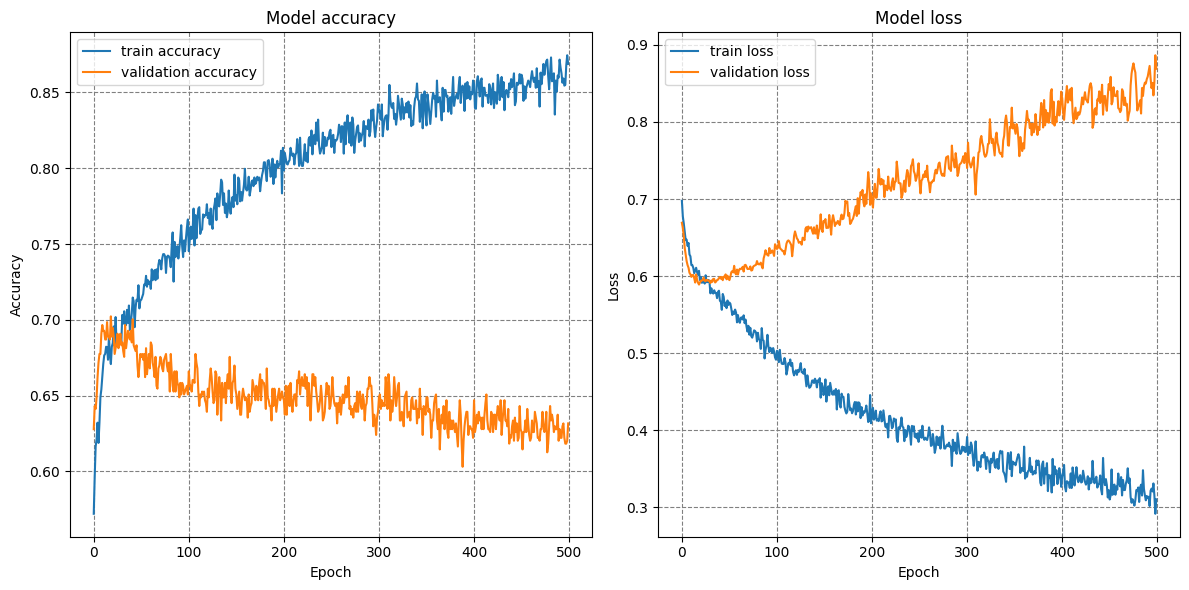

Best Validation Accuracy: 70.23%


In [55]:
layers1 = [
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train_encoded.shape[1], activation='softmax')
]
mlp1 = Sequential(layers1)

best_val_accuracy1= fit_and_evaluate_MLP(mlp1, "mlp1",epochs=500)
# cross_val_MLP(layers1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



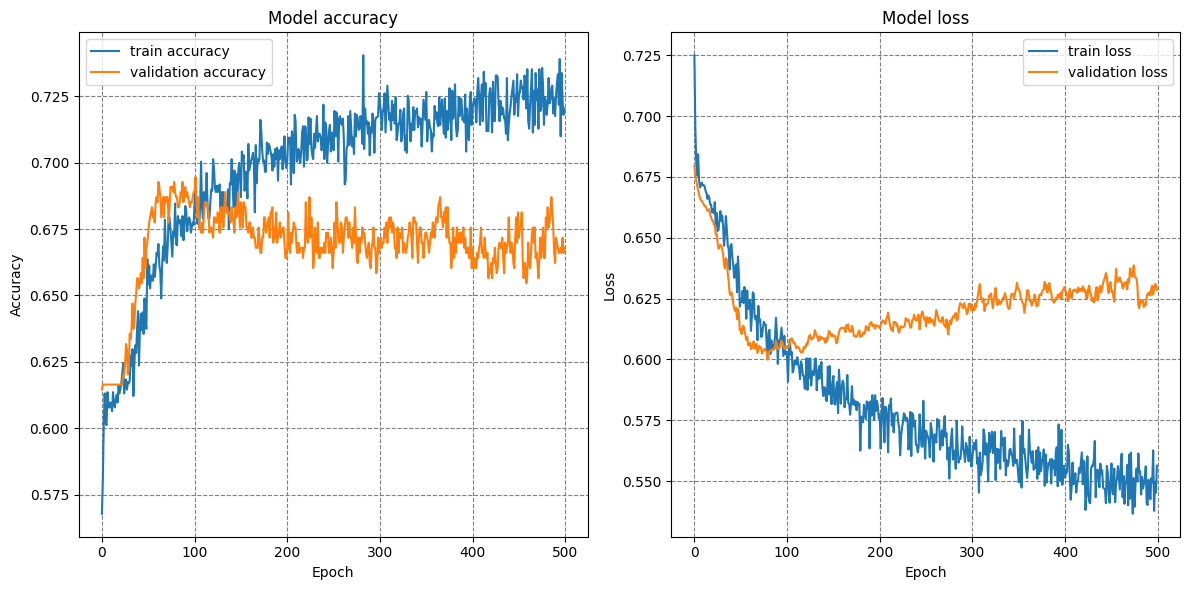

Best Validation Accuracy: 69.47%


In [64]:
layers2 = [
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(y_train_encoded.shape[1], activation='softmax')
]
mlp2 = Sequential(layers2)
best_val_accuracy2 = fit_and_evaluate_MLP(mlp2, "mlp2", epochs=500)

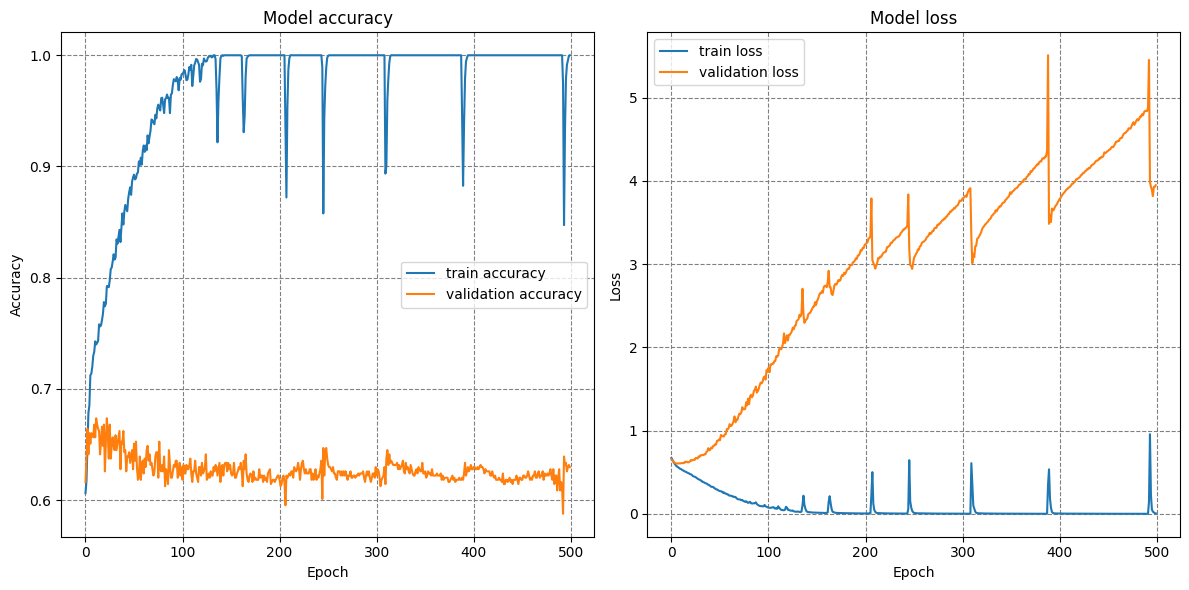

Best Validation Accuracy: 67.37%


In [65]:
layers3 = [
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')
]
mlp3 = Sequential(layers3)
best_val_accuracy3 = fit_and_evaluate_MLP(mlp3, "mlp3", epochs=500)

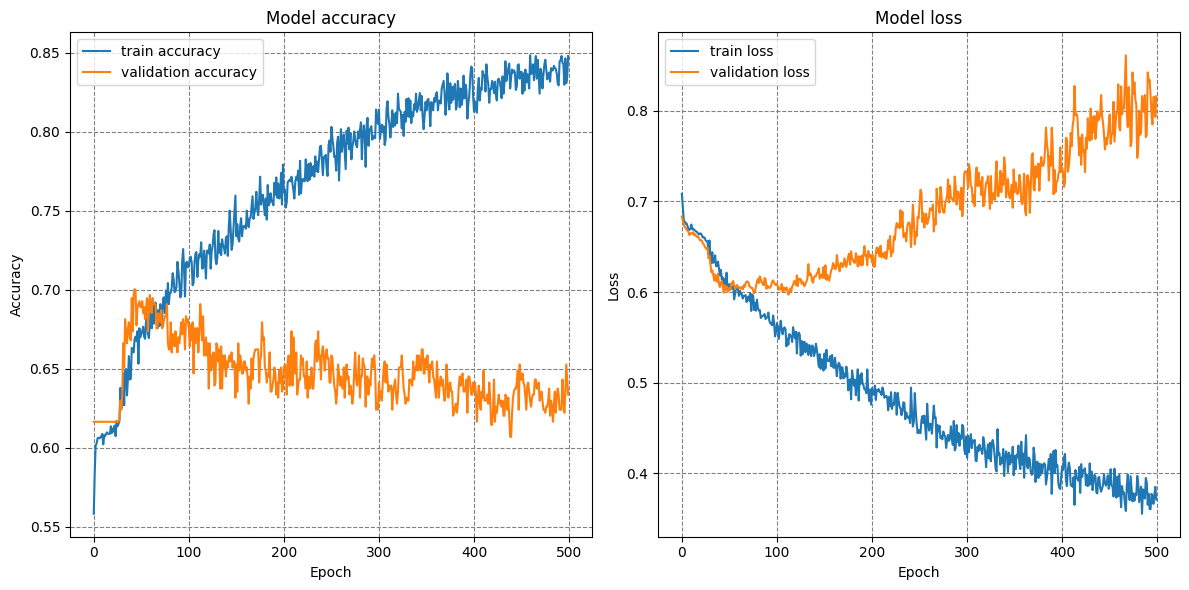

Best Validation Accuracy: 70.04%


In [66]:
layers4 = [
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(y_train_encoded.shape[1], activation='softmax')
]
mlp4 = Sequential(layers4)
best_val_accuracy4 = fit_and_evaluate_MLP(mlp4, "mlp4",epochs=500)

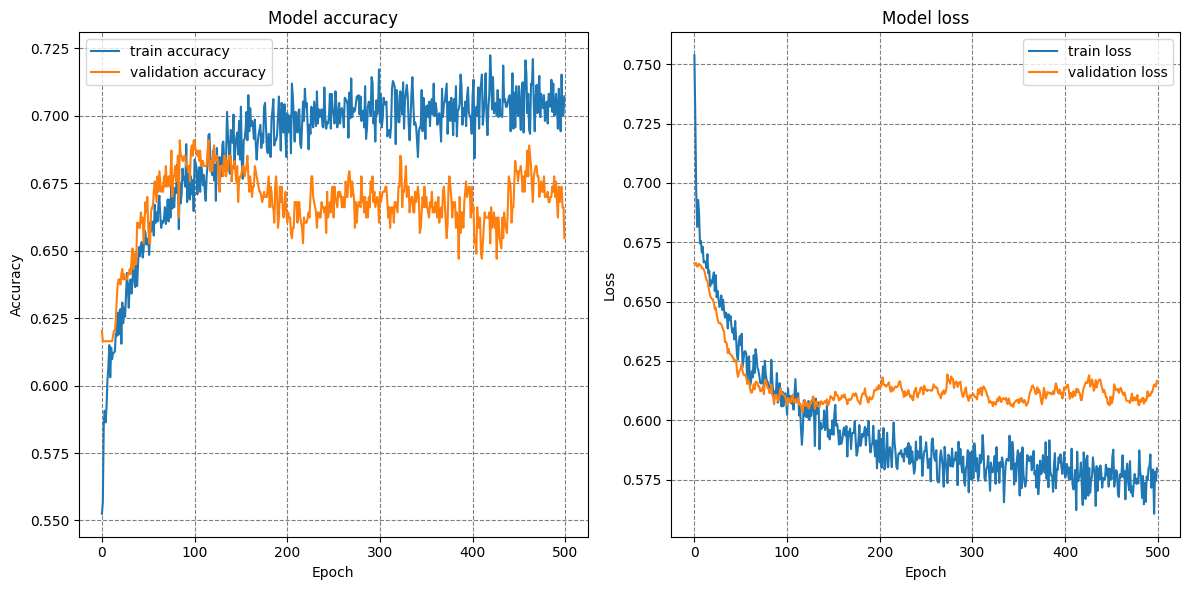

Best Validation Accuracy: 69.08%


In [67]:
layers5 = [
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y_train_encoded.shape[1], activation='softmax')
]
mlp5 = Sequential(layers5)
best_val_accuracy5 = fit_and_evaluate_MLP(mlp5, "mlp5", epochs=500)

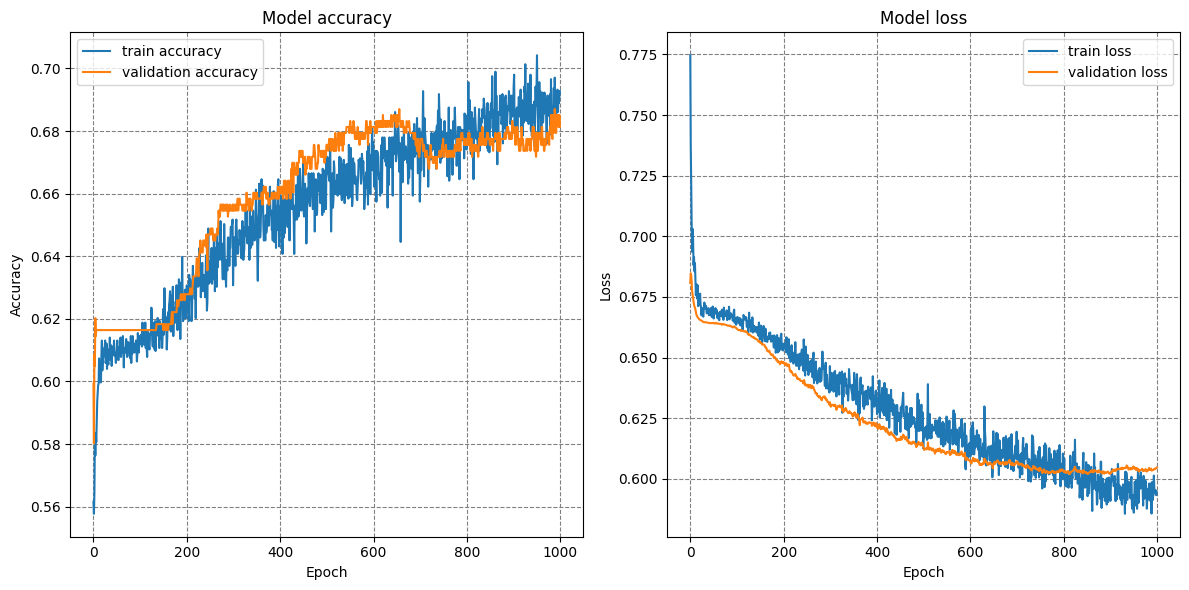

Best Validation Accuracy: 68.70%


In [68]:
layers6 = [
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(y_train_encoded.shape[1], activation='softmax')
]
mlp6 = Sequential(layers6)
best_val_accuracy6 = fit_and_evaluate_MLP(mlp6, "mlp6", optimizer="sgd", epochs=1000)

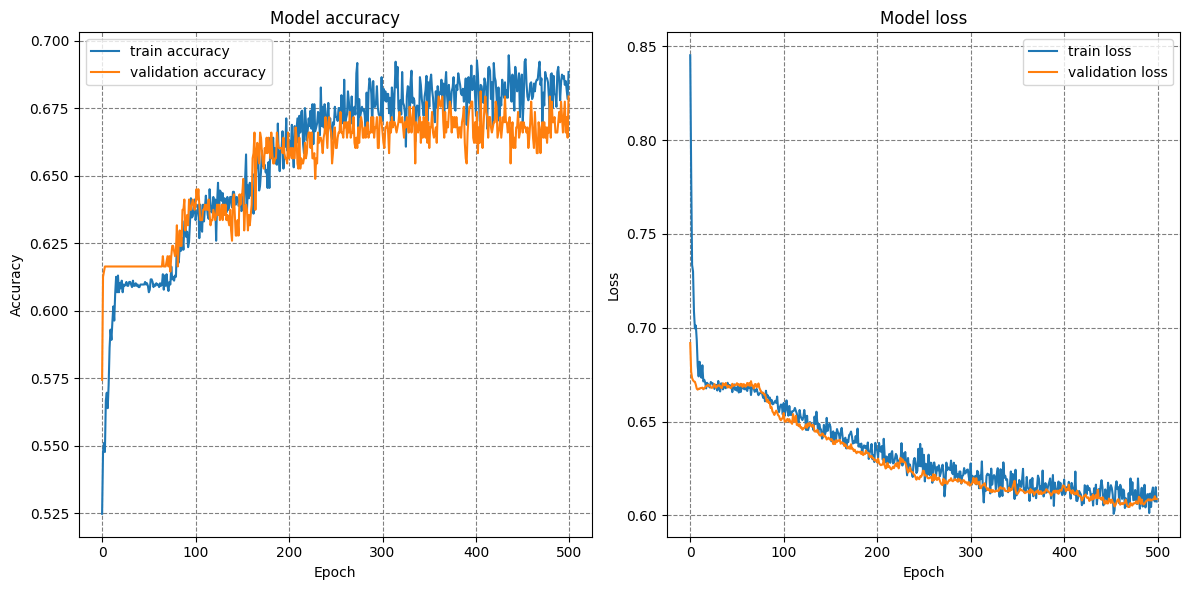

Best Validation Accuracy: 68.13%


In [69]:
layers7 = [
    Dense(32, activation='tanh', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='tanh'),
    Dropout(0.5),
    Dense(32, activation='tanh'),
    Dropout(0.5),
    Dense(y_train_encoded.shape[1], activation='softmax')
]
mlp7 = Sequential(layers7)
best_val_accuracy5 = fit_and_evaluate_MLP(mlp7, "mlp7", epochs=500)

# Porównanie modeli

In [20]:
# from scikeras.wrappers import KerasClassifier
# def cross_val_MLP(model_name):
#     print(model_name, "start")
#     model = load_model(f'drive/MyDrive/colab/{model_name}.keras')
#     print("wcyztano model")
#     keras_model = KerasClassifier(build_fn=model, epochs=10, batch_size=32, verbose=0)
#     print(("zawinieto model w keras classifier"))
#     start_time = time.time()
#     accuracies = cross_val_score(model, features, labels, scoring="accuracy", cv=KF)
#     print("zrobiono cross validation")
#     end_time = time.time()
#     execution_time = (end_time - start_time)
#     return model_name, accuracies.mean()*100, execution_time

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [81]:
lr = LogisticRegression(**best_params_lr)
dt = DecisionTreeClassifier(**best_params_dt)
rf = RandomForestClassifier(**best_params_rf)
etc = ExtraTreesClassifier(**best_params_et)
svm = SVC(**best_params_svc)
knn = KNeighborsClassifier(**best_params_knn)
gbc = GradientBoostingClassifier(**best_params_gb)
abc = AdaBoostClassifier(**best_params_ab)
nb = GaussianNB()

In [82]:
models = [lr, dt, rf, etc, svm, knn, abc, gbc, nb]

accu_list = []
model_names = []
# execution_times = []

for model in models:
  name, accuracy, ex_time = fit_evaluate_model(model)
  accu_list.append(accuracy)
  model_names.append(name)
  # execution_times.append(ex_time)


LogisticRegression start
DecisionTreeClassifier start
RandomForestClassifier start
ExtraTreesClassifier start
SVC start
KNeighborsClassifier start
AdaBoostClassifier start


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: Fu

GradientBoostingClassifier start
GaussianNB start


In [100]:
model_acc_df = pd.DataFrame({"Model": model_names, "Cross_Val_Accuracy": accu_list})
model_acc_df

,Model,Cross_Val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,61.691910
2,RandomForestClassifier,63.462856
3,ExtraTreesClassifier,64.225424
4,SVC,65.080339
5,KNeighborsClassifier,63.278393
6,AdaBoostClassifier,62.026718
7,GradientBoostingClassifier,61.997300
8,GaussianNB,61.263871


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report for mlp1:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       397
           1       0.62      0.34      0.44       259

    accuracy                           0.66       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.65      0.66      0.63       656


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report for mlp2:
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       397
           1       0.64      0.32      0.42       259

    accuracy                           0.66       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.65      0.66      0.63       656


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report for mlp3:
              precision    recall  f1-score   support

           0       0.66      0.81      0.72       397
           1       0.5

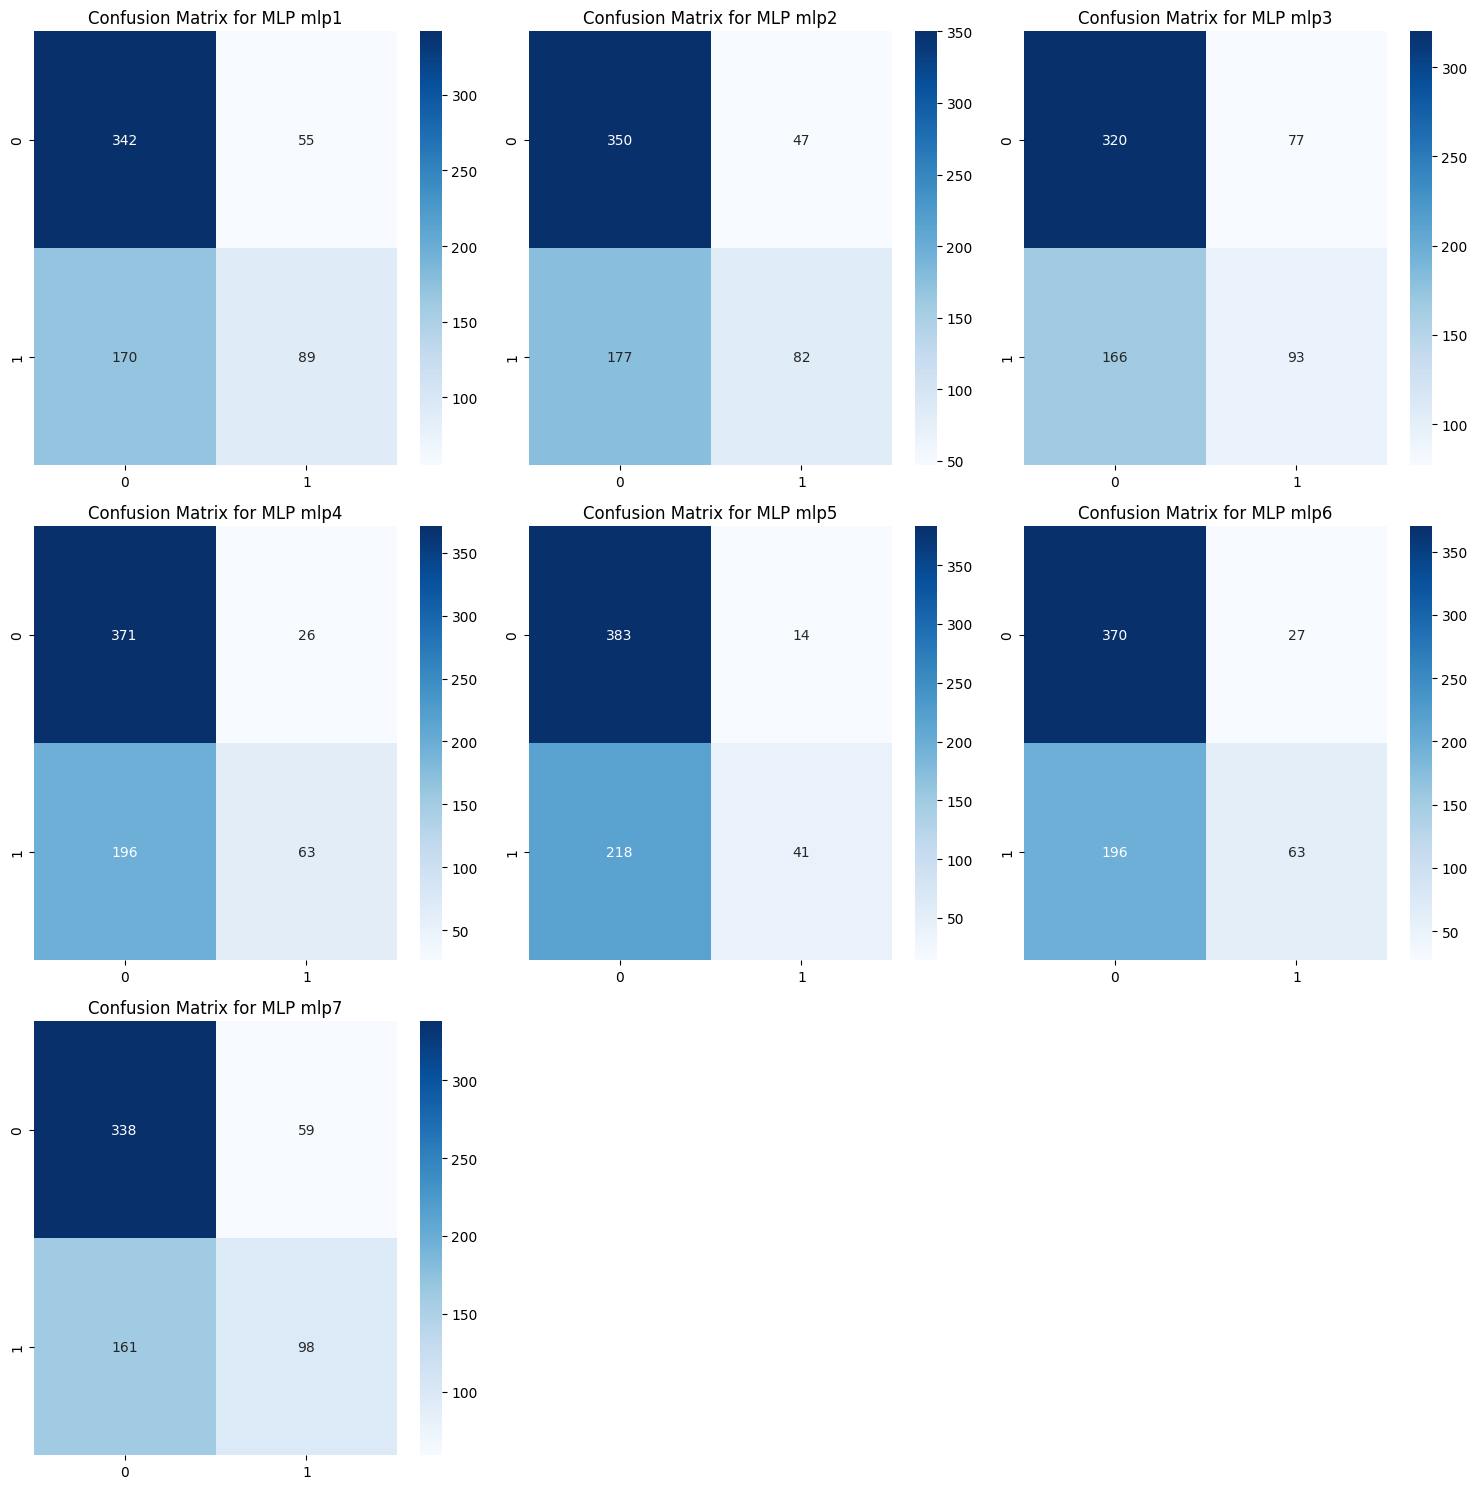

In [107]:
from sklearn.metrics import classification_report, confusion_matrix



mlps = ["mlp1", "mlp2", "mlp3", "mlp4", "mlp5", "mlp6", "mlp7"]

# Obliczenie liczby wierszy i kolumn dla macierzy pomyłek w wykresie
num_rows = len(mlps) // 2
if len(mlps) % 2 == 0:
    num_cols = 2
else:
    num_cols = len(mlps) // num_rows + 1

# Inicjalizacja subplotów
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Iteracja po modelach MLP i ich odpowiadających osiach w subplotach
for m, ax in zip(mlps, axes.flatten()):
    # Wczytanie modelu MLP
    mlp_to_test = load_model(f'drive/MyDrive/colab/{m}.keras')

    # Prognozowanie etykiet dla danych testowych
    y_pred_mlp = mlp_to_test.predict(X_test)
    y_pred_mlp_classes = np.argmax(y_pred_mlp, axis=1)

    # Generowanie macierzy pomyłek
    conf_matrix_mlp = confusion_matrix(np.argmax(y_test_dense, axis=1), y_pred_mlp_classes)

    # Tworzenie wykresu macierzy pomyłek
    sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix for MLP {m}")

    report = classification_report(np.argmax(y_test_dense, axis=1),  y_pred_mlp_classes)

    print(f"Classification Report for {m}:")
    print(report)
    print()

# Usunięcie nieużywanych subplotów
for i in range(len(mlps), num_rows * num_cols):
    axes.flatten()[i].remove()

plt.tight_layout()
plt.show()

In [90]:
models = [lr, dt, rf, etc, svm, knn, gbc, abc, nb]
for model in models:
  model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.61      1.00      0.75       397
           1       0.50      0.00      0.01       259

    accuracy                           0.61       656
   macro avg       0.55      0.50      0.38       656
weighted avg       0.56      0.61      0.46       656


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       397
           1       0.67      0.25      0.37       259

    accuracy                           0.66       656
   macro avg       0.66      0.59      0.56       656
weighted avg       0.66      0.66      0.61       656


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.67      0.87      0.75       397
           1       0.63      0.34      0.44       259

    accuracy                      

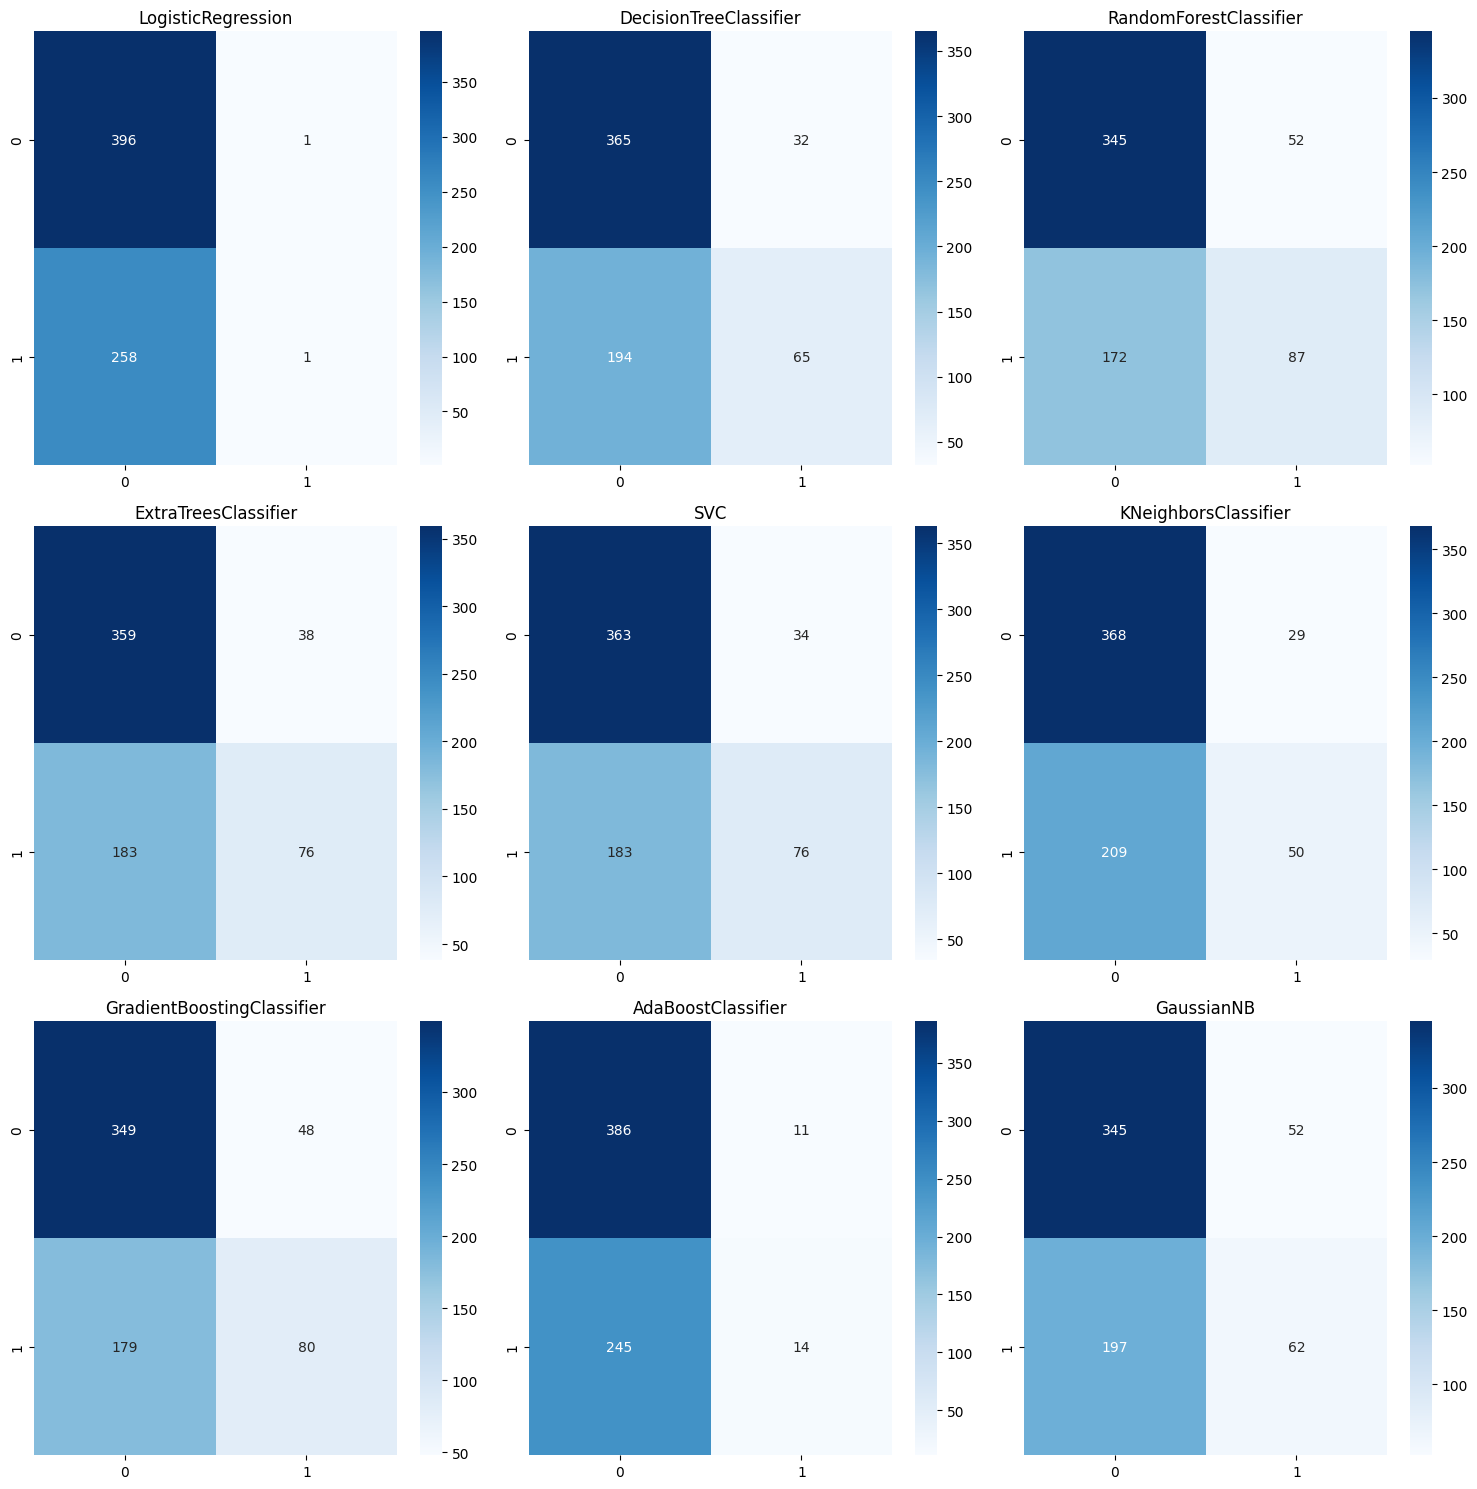

In [92]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for model, ax in zip(models, axes.flatten()):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(model.__class__.__name__)
    report = classification_report(y_test, y_pred)

    print(f"Classification Report for {model.__class__.__name__}:")
    print(report)
    print()

plt.tight_layout()
plt.show()